Fonte:

https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [1]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


<Axes: >

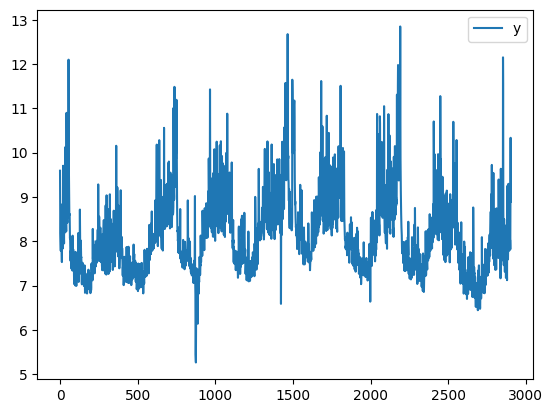

In [3]:
df.plot()

In [4]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))
holidays

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1
5,playoff,2011-01-08,0,1
6,playoff,2013-01-12,0,1
7,playoff,2014-01-12,0,1
8,playoff,2014-01-19,0,1
9,playoff,2014-02-02,0,1


In [5]:
m = Prophet(holidays=holidays)
m.fit(df)

15:29:27 - cmdstanpy - INFO - Chain [1] start processing
15:29:27 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
future = m.make_future_dataframe(periods=365)
future

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18


In [7]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.046547,8.239405,9.430037,8.046547,8.046547,0.796310,0.796310,0.796310,0.0,...,0.329678,0.329678,0.329678,0.466632,0.466632,0.466632,0.0,0.0,0.0,8.842857
1,2007-12-11,8.044914,8.052261,9.213074,8.044914,8.044914,0.585376,0.585376,0.585376,0.0,...,0.133027,0.133027,0.133027,0.452349,0.452349,0.452349,0.0,0.0,0.0,8.630290
2,2007-12-12,8.043282,7.822911,9.002140,8.043282,8.043282,0.385741,0.385741,0.385741,0.0,...,-0.053213,-0.053213,-0.053213,0.438954,0.438954,0.438954,0.0,0.0,0.0,8.429023
3,2007-12-13,8.041649,7.832005,9.018487,8.041649,8.041649,0.367587,0.367587,0.367587,0.0,...,-0.059202,-0.059202,-0.059202,0.426789,0.426789,0.426789,0.0,0.0,0.0,8.409236
4,2007-12-14,8.040017,7.830845,8.971049,8.040017,8.040017,0.359842,0.359842,0.359842,0.0,...,-0.056313,-0.056313,-0.056313,0.416155,0.416155,0.416155,0.0,0.0,0.0,8.399859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.201695,7.310151,8.746328,6.894012,7.571839,0.831700,0.831700,0.831700,0.0,...,0.016508,0.016508,0.016508,0.815192,0.815192,0.815192,0.0,0.0,0.0,8.033394
3266,2017-01-16,7.200711,7.639888,9.066500,6.891399,7.572283,1.167364,1.167364,1.167364,0.0,...,0.329678,0.329678,0.329678,0.837685,0.837685,0.837685,0.0,0.0,0.0,8.368074
3267,2017-01-17,7.199726,7.488125,8.907245,6.888845,7.572727,0.993416,0.993416,0.993416,0.0,...,0.133027,0.133027,0.133027,0.860389,0.860389,0.860389,0.0,0.0,0.0,8.193142
3268,2017-01-18,7.198742,7.339470,8.707250,6.885966,7.574586,0.829838,0.829838,0.829838,0.0,...,-0.053213,-0.053213,-0.053213,0.883051,0.883051,0.883051,0.0,0.0,0.0,8.028580


In [9]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'holidays', 'holidays_lower', 'holidays_upper', 'playoff',
       'playoff_lower', 'playoff_upper', 'superbowl', 'superbowl_lower',
       'superbowl_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'yearly',
       'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [11]:
forecast[forecast['holidays'] > 0][['holidays', 'holidays_lower', 'holidays_upper', 'playoff',
       'playoff_lower', 'playoff_upper', 'superbowl', 'superbowl_lower',
       'superbowl_upper']]

,holidays,holidays_lower,holidays_upper,playoff,playoff_lower,playoff_upper,superbowl,superbowl_lower,superbowl_upper
34,1.228031,1.228031,1.228031,1.228031,1.228031,1.228031,0.000000,0.000000,0.000000
35,1.901884,1.901884,1.901884,1.901884,1.901884,1.901884,0.000000,0.000000,0.000000
361,1.228031,1.228031,1.228031,1.228031,1.228031,1.228031,0.000000,0.000000,0.000000
362,1.901884,1.901884,1.901884,1.901884,1.901884,1.901884,0.000000,0.000000,0.000000
730,1.228031,1.228031,1.228031,1.228031,1.228031,1.228031,0.000000,0.000000,0.000000
731,1.901884,1.901884,1.901884,1.901884,1.901884,1.901884,0.000000,0.000000,0.000000
737,1.901884,1.901884,1.901884,1.901884,1.901884,1.901884,0.000000,0.000000,0.000000
750,2.429352,2.429352,2.429352,1.228031,1.228031,1.228031,1.201321,1.201321,1.201321
1076,1.228031,1.228031,1.228031,1.228031,1.228031,1.228031,0.000000,0.000000,0.000000
1077,1.901884,1.901884,1.901884,1.901884,1.901884,1.901884,0.000000,0.000000,0.000000


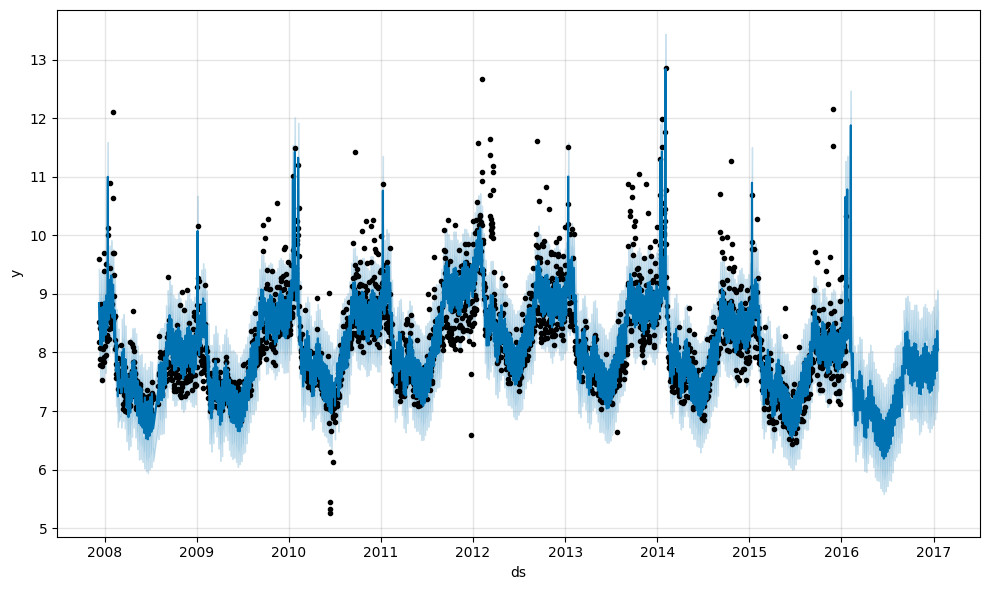

In [12]:
fig1 = m.plot(forecast)

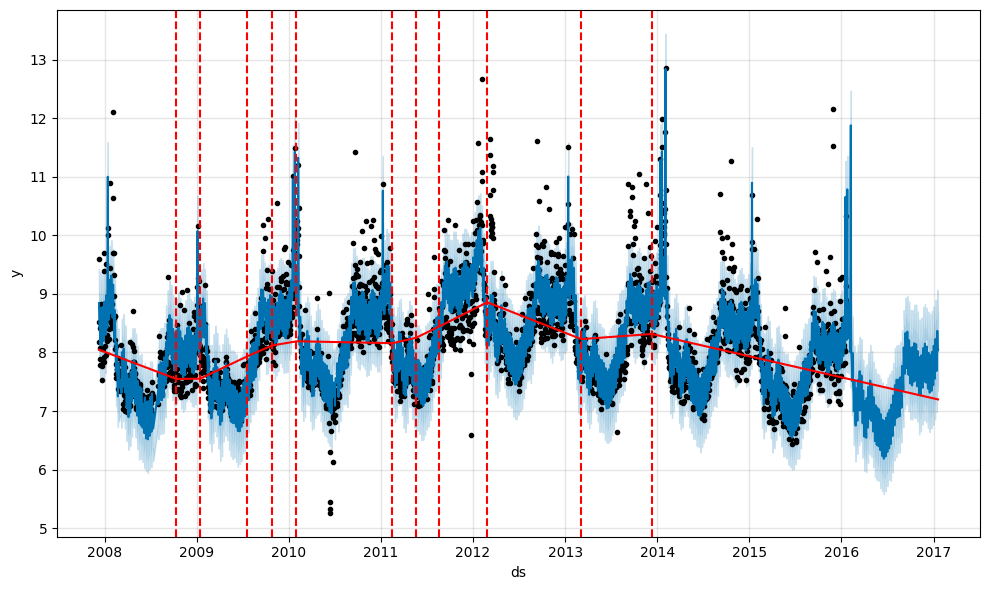

In [13]:
fig_cp = m.plot(forecast)
a = add_changepoints_to_plot(fig_cp.gca(), m, forecast)

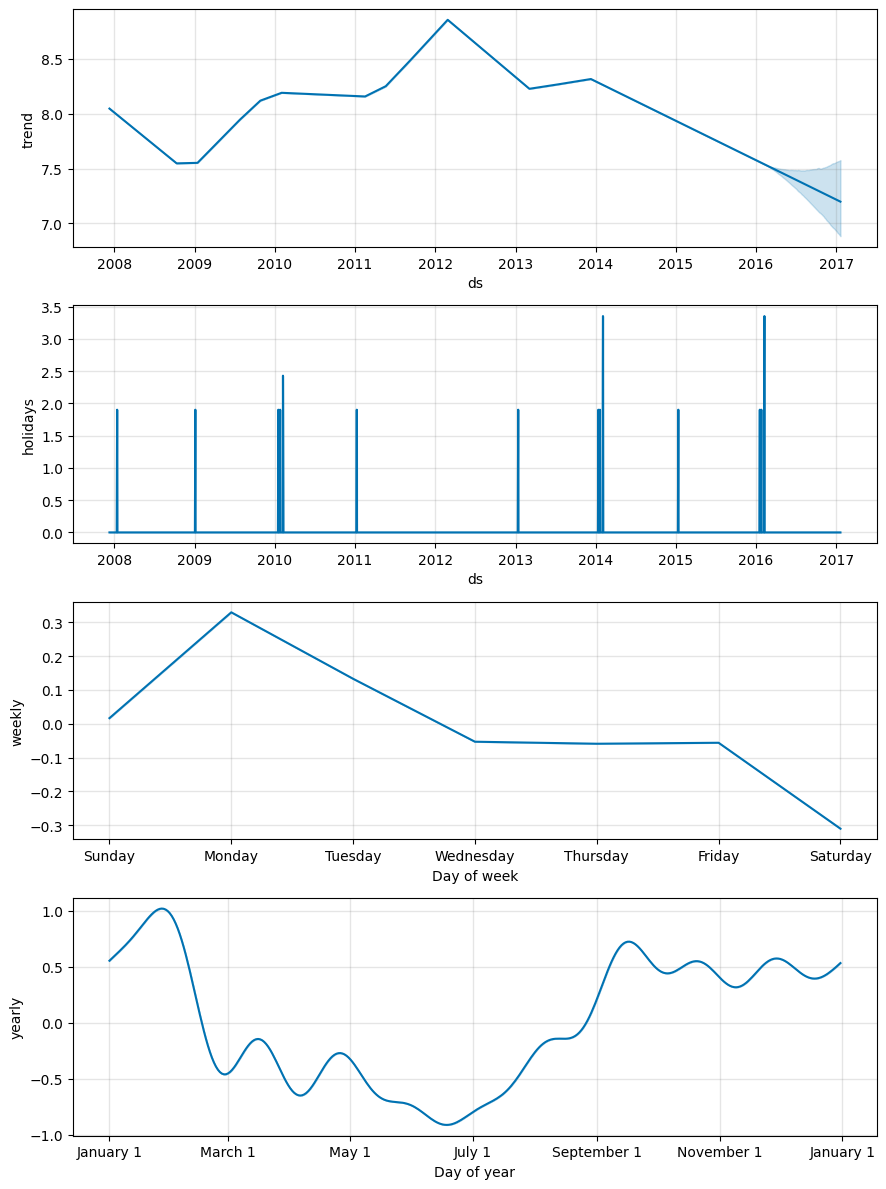

In [14]:
fig2 = m.plot_components(forecast)